In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Eng18 = pd.read_excel('C:/Users/trent/OneDrive/Documents/Repositories/Foundations_of_Sports_Analytics/data/external/Engsoccer2017-18.xlsx')
print(Eng18.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [3]:
Eng18

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H
...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H


In [4]:
Eng18['hwinvalue']=np.where(Eng18['FTR']=='H',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['awinvalue']=np.where(Eng18['FTR']=='A',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['count']=1

In [ ]:
Eng18['Date'] = pd.to_datetime(Eng18['Date'])

Half1 = Eng18[Eng18['Date'] < pd.to_datetime('2018-01-01')]
Half1.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,1103,1103.000000,1103.000000,1103.000000,1103.000000,1103.0
mean,2017-10-03 07:04:17.842248704,1.436990,1.166818,0.565277,0.434723,1.0
min,2017-01-10 00:00:00,0.000000,0.000000,0.000000,0.000000,1.0
25%,2017-09-09 00:00:00,0.000000,0.000000,0.000000,0.000000,1.0
50%,2017-10-17 00:00:00,1.000000,1.000000,0.500000,0.500000,1.0
75%,2017-11-28 00:00:00,2.000000,2.000000,1.000000,1.000000,1.0
max,2017-12-31 00:00:00,8.000000,7.000000,1.000000,1.000000,1.0
std,NaN,1.246909,1.147595,0.426866,0.426866,0.0


In [9]:
Half2 = Eng18[Eng18['Date'] >= pd.to_datetime('2018-01-01')]
Half2.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,933,933.000000,933.000000,933.000000,933.000000,933.0
mean,2018-04-11 17:15:37.620578816,1.454448,1.132905,0.574491,0.425509,1.0
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,1.0
25%,2018-02-13 00:00:00,1.000000,0.000000,0.000000,0.000000,1.0
50%,2018-03-24 00:00:00,1.000000,1.000000,0.500000,0.500000,1.0
75%,2018-05-05 00:00:00,2.000000,2.000000,1.000000,1.000000,1.0
max,2018-12-04 00:00:00,6.000000,6.000000,1.000000,1.000000,1.0
std,NaN,1.214767,1.065213,0.418936,0.418936,0.0


In [10]:
Enghome1 = Half1.groupby(['HomeTeam','Div'])[['count','hwinvalue', 'FTHG','FTAG']].sum().reset_index()
Enghome1 = Enghome1.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
Enghome1

,team,Div,Ph,hwinvalue,FTHGh,FTAGh
0,AFC Wimbledon,FL1,12,4.5,11,17
1,Accrington,FL2,11,7.0,19,12
2,Arsenal,EPL,10,8.5,25,10
3,Aston Villa,FLCH,12,8.5,17,10
4,Barnet,FL2,12,4.5,10,14
...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14
88,Wigan,FL1,13,10.0,21,4
89,Wolves,FLCH,12,10.0,25,10
90,Wycombe,FL2,13,8.5,27,18


In [17]:
Engaway1 = Half1.groupby('AwayTeam')[['count','awinvalue', 'FTHG','FTAG']].sum().reset_index()
Engaway1 = Engaway1.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
Engaway1

,team,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,12,4.5,14,9
1,Accrington,13,7.0,18,19
2,Arsenal,11,5.0,16,13
3,Aston Villa,13,6.5,14,16
4,Barnet,13,3.0,23,15
...,...,...,...,...,...
87,West Ham,11,3.0,24,12
88,Wigan,11,8.5,8,28
89,Wolves,13,10.0,10,22
90,Wycombe,12,6.0,16,17


In [18]:
Eng17 = pd.merge(Enghome1, Engaway1, on = ['team'])
Eng17

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17


In [19]:
Eng17['W'] = Eng17['hwinvalue']+Eng17['awinvalue']
Eng17['G'] = Eng17['Ph']+Eng17['Pa']
Eng17['GF'] = Eng17['FTHGh']+Eng17['FTAGa']
Eng17['GA'] = Eng17['FTAGh']+Eng17['FTHGa']
Eng17

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,9.0,24,20,31
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,14.0,24,38,30
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,15.0,25,33,24
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,7.5,25,25,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,7.0,20,22,38
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,18.5,24,49,12
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,20.0,25,47,20
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,14.5,25,44,34


In [30]:
Eng17['wpc17'] = Eng17['W']/Eng17['G']
Eng17['pyth17'] = Eng17['GF']**2/(Eng17['GF']**2 + Eng17['GA']**2)
Eng17

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth,wpc17,pyth17
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,9.0,24,20,31,0.375000,0.293902,0.375000,0.293902
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,14.0,24,38,30,0.583333,0.616041,0.583333,0.616041
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132,0.642857,0.681132
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,15.0,25,33,24,0.600000,0.654054,0.600000,0.654054
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,7.5,25,25,37,0.300000,0.313440,0.300000,0.313440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,7.0,20,22,38,0.350000,0.251037,0.350000,0.251037
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,18.5,24,49,12,0.770833,0.943418,0.770833,0.943418
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,20.0,25,47,20,0.800000,0.846685,0.800000,0.846685
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,14.5,25,44,34,0.580000,0.626132,0.580000,0.626132


In [31]:
Enghome2 = Half2.groupby(['HomeTeam','Div'])[['count','hwinvalue', 'FTHG','FTAG']].sum().reset_index()
Enghome2 = Enghome2.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
Enghome2

,team,Div,Ph,hwinvalue,FTHGh,FTAGh
0,AFC Wimbledon,FL1,11,6.5,14,13
1,Accrington,FL2,12,11.5,23,7
2,Arsenal,EPL,9,7.5,29,10
3,Aston Villa,FLCH,11,9.0,25,9
4,Barnet,FL2,11,6.5,14,11
...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12
88,Wigan,FL1,10,7.0,16,7
89,Wolves,FLCH,11,8.5,22,8
90,Wycombe,FL2,10,6.0,16,17


In [32]:
Engaway2 = Half2.groupby('AwayTeam')[['count','awinvalue', 'FTHG','FTAG']].sum().reset_index()
Engaway2 = Engaway2.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
Engaway2

,team,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,11,4.5,14,13
1,Accrington,10,6.5,9,15
2,Arsenal,8,1.0,15,7
3,Aston Villa,10,5.5,9,14
4,Barnet,10,3.0,17,7
...,...,...,...,...,...
87,West Ham,8,3.0,18,12
88,Wigan,12,9.0,10,24
89,Wolves,10,6.0,11,13
90,Wycombe,11,9.5,9,19


In [33]:
Eng18 = pd.merge(Enghome2, Engaway2, on = ['team'])
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19


In [34]:
Eng18['W'] = Eng18['hwinvalue']+Eng18['awinvalue']
Eng18['G'] = Eng18['Ph']+Eng18['Pa']
Eng18['GF'] = Eng18['FTHGh']+Eng18['FTAGa']
Eng18['GA'] = Eng18['FTAGh']+Eng18['FTHGa']
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13,11.0,22,27,27
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15,18.0,22,38,16
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14,14.5,21,39,18
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7,9.5,21,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12,9.0,18,26,30
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24,16.0,22,40,17
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13,14.5,21,35,19
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19,15.5,21,35,26


In [35]:
Eng18['wpc18'] = Eng18['W']/Eng18['G']
Eng18['pyth18'] = Eng18['GF']**2/(Eng18['GF']**2 + Eng18['GA']**2)
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc18,pyth18
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13,11.0,22,27,27,0.500000,0.500000
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15,18.0,22,38,16,0.818182,0.849412
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14,14.5,21,39,18,0.690476,0.824390
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7,9.5,21,21,28,0.452381,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12,9.0,18,26,30,0.500000,0.428934
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24,16.0,22,40,17,0.727273,0.847009
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13,14.5,21,35,19,0.690476,0.772383
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19,15.5,21,35,26,0.738095,0.644398


In [36]:
Half2predictor = pd.merge(Eng17,Eng18, on='team')
Half2predictor

,team,Div_x,Ph_x,hwinvalue_x,FTHGh_x,FTAGh_x,Pa_x,awinvalue_x,FTHGa_x,FTAGa_x,...,Pa_y,awinvalue_y,FTHGa_y,FTAGa_y,W_y,G_y,GF_y,GA_y,wpc18,pyth18
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,...,11,4.5,14,13,11.0,22,27,27,0.500000,0.500000
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,...,10,6.5,9,15,18.0,22,38,16,0.818182,0.849412
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,...,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,...,10,5.5,9,14,14.5,21,39,18,0.690476,0.824390
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,...,10,3.0,17,7,9.5,21,21,28,0.452381,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,...,8,3.0,18,12,9.0,18,26,30,0.500000,0.428934
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,...,12,9.0,10,24,16.0,22,40,17,0.727273,0.847009
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,...,10,6.0,11,13,14.5,21,35,19,0.690476,0.772383
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,...,11,9.5,9,19,15.5,21,35,26,0.738095,0.644398


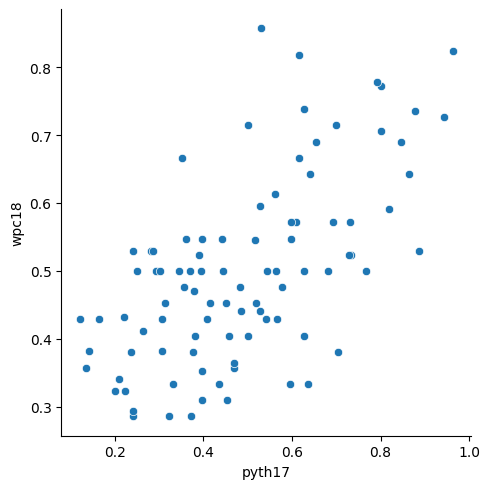

In [37]:
sns.relplot(x="pyth17", y="wpc18", data = Half2predictor)

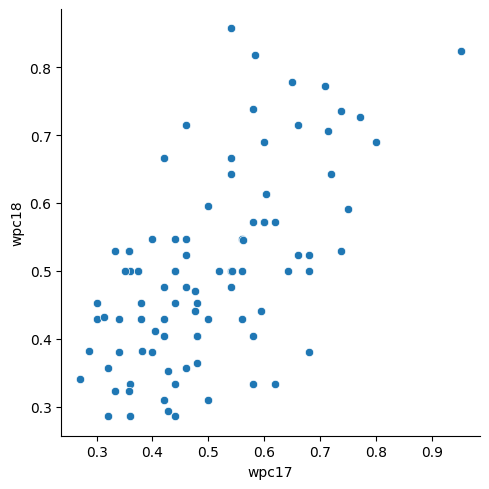

In [38]:
sns.relplot(x="wpc17", y="wpc18", data = Half2predictor)

In [39]:
keyvars = Half2predictor[['team','wpc18','wpc17','pyth17','pyth18']]
keyvars[['wpc18','wpc17','pyth17','pyth18']].corr()

,wpc18,wpc17,pyth17,pyth18
wpc18,1.000000,0.601684,0.615636,0.942746
wpc17,0.601684,1.000000,0.959210,0.618430
pyth17,0.615636,0.959210,1.000000,0.651551
pyth18,0.942746,0.618430,0.651551,1.000000
